In [21]:
cd

C:\Users\User


In [22]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
import numpy as np
from itertools import product # iterative combinations
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
예측해야하는게 한달간 item_cnt_day

SyntaxError: invalid syntax (<ipython-input-11-5f20371499ab>, line 1)

In [24]:
train=pd.read_csv('./Desktop/kaggle_semi_project/sales_train.csv')
test=pd.read_csv('./Desktop/kaggle_semi_project/test.csv')
item_cat=pd.read_csv('./Desktop/kaggle_semi_project/item_categories.csv')
items=pd.read_csv('./Desktop/kaggle_semi_project/items.csv')
shops=pd.read_csv('./Desktop/kaggle_semi_project/shops.csv')
sample_sub=pd.read_csv('./Desktop/kaggle_semi_project/sample_submission.csv')

In [110]:
sample_sub.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [25]:
test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [26]:
train.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')

In [27]:
(train['item_id'].value_counts())==1

20949    False
5822     False
17717    False
2808     False
4181     False
         ...  
361       True
3589      True
18784     True
360       True
0         True
Name: item_id, Length: 21807, dtype: bool

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


판매량 예측은 결국 회귀 문제라고보면된다
shop_id와
item_id 는 원핫인코딩 분류로 하면될것같다는 생각이든다. dummy변수

물품가격과 판매량은 수치자료로 표준화해서 상관분석하면 되지않을까

당장 가게별 매출에 상관관계가 있어보이는것은 가게위치,물품의종류,물품가격,날짜도 어느정도 관계있을듯,(크리스마스, 떙스기빙데이, 주말)
많이팔리는 물품이 적게팔리는 물품보다 매출에 큰영향

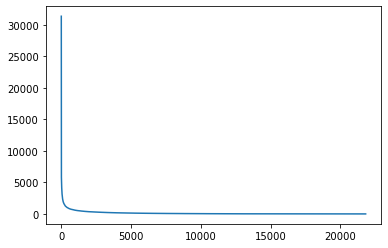

In [29]:
n=train['item_id'].value_counts()
plt.plot(range(21807),n)

In [30]:
train['item_id'].quantile(0.01)

556.0

<AxesSubplot:>

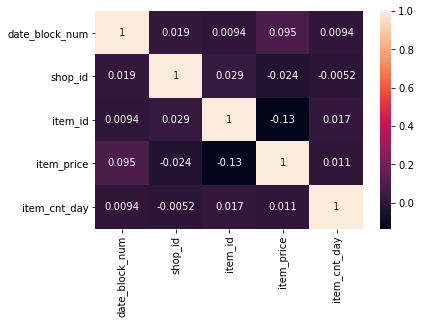

In [31]:
sns.heatmap(train.corr(),annot=True)

In [34]:
train.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')

In [35]:
train['date'] = pd.to_datetime(train['date'])

In [38]:
train['year'] = train['date'].dt.year

In [40]:
train['month']= train['date'].dt.month

In [41]:
train['day'] = train['date'].dt.day

In [42]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day
0,2013-02-01,0,59,22154,999.00,1.0,2013,2,1
1,2013-03-01,0,25,2552,899.00,1.0,2013,3,1
2,2013-05-01,0,25,2552,899.00,-1.0,2013,5,1
3,2013-06-01,0,25,2554,1709.05,1.0,2013,6,1
4,2013-01-15,0,25,2555,1099.00,1.0,2013,1,15


In [44]:
df = train.copy()  달에있는 item_cnt_day

In [49]:
df.set_index('date',drop=True,inplace=True, 

TypeError: set_index() got an unexpected keyword argument 'ascending'

In [52]:
df = df.sort_index()   

In [67]:
df['date_block_num'].value_counts()

11    143246
23    130786
2     121347
0     115690
1     108613
7     104772
6     100548
5     100403
12     99349
10     96736
8      96137
9      94202
3      94109
14     92733
4      91759
13     89830
24     88522
19     86614
22     86428
17     82408
21     79361
18     78760
16     78529
15     77906
20     73157
25     71808
26     69977
31     57029
27     56274
30     55549
29     54617
28     54548
33     53514
32     50588
Name: date_block_num, dtype: int64

In [55]:
df.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day',
       'year', 'month', 'day'],
      dtype='object')

<AxesSubplot:xlabel='date_block_num', ylabel='Count'>

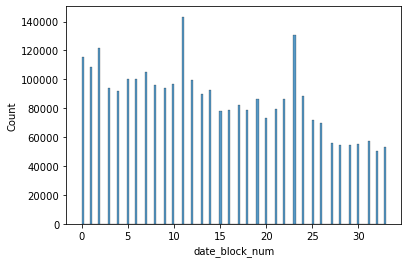

In [56]:
sns.histplot(x='date_block_num',data=df) #11근처에서 높아짐,#23정도에서 다시높아짐 연말에 높아짐

<AxesSubplot:xlabel='year', ylabel='Count'>

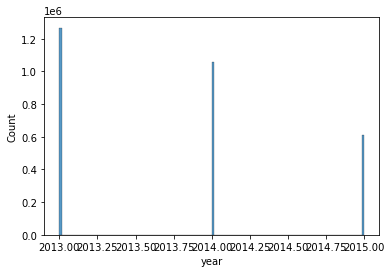

In [59]:
sns.histplot(x='year',data=df)

<AxesSubplot:xlabel='item_price', ylabel='Count'>

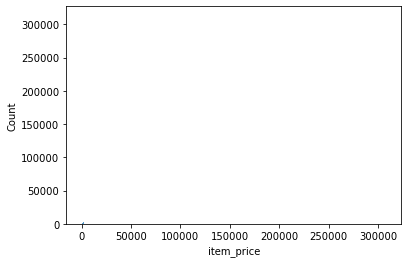

In [61]:
sns.histplot(x='item_price',data=df)

In [71]:
df.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day
date,,,,,,,,
2013-01-01,0,46,18616,349.0,1.0,2013,1,1
2013-01-01,0,54,11854,199.0,1.0,2013,1,1
2013-01-01,0,28,4906,1799.0,1.0,2013,1,1
2013-01-01,0,42,2931,99.0,1.0,2013,1,1
2013-01-01,0,54,11604,349.0,1.0,2013,1,1


In [72]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00,2.013777e+03,6.432552e+00,1.566783e+01
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00,7.684790e-01,3.504695e+00,9.128682e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01,2.013000e+03,1.000000e+00,1.000000e+00
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,2.013000e+03,3.000000e+00,7.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00,2.014000e+03,9.000000e+00,2.400000e+01
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,2.015000e+03,1.200000e+01,3.100000e+01


In [75]:
df=df.reset_index()

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 9 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
 6   year            int64         
 7   month           int64         
 8   day             int64         
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 201.6 MB


In [88]:
df_sum=pd.DataFrame(df.groupby(['date','shop_id'])['item_cnt_day'].sum())

In [99]:
df_sum['item_cnt_day']

date        shop_id
2013-01-01  2          24.0
            7          89.0
            8          50.0
            13         31.0
            14         66.0
                       ... 
2015-12-10  55         53.0
            56         18.0
            57         25.0
            58         28.0
            59         22.0
Name: item_cnt_day, Length: 47228, dtype: float64

In [103]:
df.groupby(['shop_id'])['item_cnt_day'].mean()

shop_id
0     1.187481
1     1.111483
2     1.178100
3     1.110567
4     1.149051
5     1.120040
6     1.215647
7     1.154659
8     1.053634
9     4.229805
10    1.146095
11    1.146293
12    2.117888
13    1.108786
14    1.254090
15    1.196434
16    1.168753
17    1.125839
18    1.230315
19    1.149333
20    3.276786
21    1.179365
22    1.325659
23    1.106563
24    1.204669
25    1.299918
26    1.259321
27    1.296974
28    1.297559
29    1.192748
30    1.195989
31    1.318886
32    1.104945
33    1.090511
34    1.121523
35    1.180871
36    1.078431
37    1.166961
38    1.171104
39    1.236384
40    1.161146
41    1.175304
42    1.326591
43    1.288325
44    1.136807
45    1.167284
46    1.191025
47    1.192998
48    1.152554
49    1.078301
50    1.169779
51    1.097540
52    1.143488
53    1.165076
54    1.294884
55    1.823118
56    1.122260
57    1.201647
58    1.144077
59    1.163508
Name: item_cnt_day, dtype: float64

In [104]:
df.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'year', 'month', 'day'],
      dtype='object')

In [109]:
df['year']

0          2013
1          2013
2          2013
3          2013
4          2013
           ... 
2935844    2015
2935845    2015
2935846    2015
2935847    2015
2935848    2015
Name: year, Length: 2935849, dtype: int64

In [113]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day
0,2013-01-01,0,46,18616,349.0,1.0,2013,1,1
1,2013-01-01,0,54,11854,199.0,1.0,2013,1,1
2,2013-01-01,0,28,4906,1799.0,1.0,2013,1,1
3,2013-01-01,0,42,2931,99.0,1.0,2013,1,1
4,2013-01-01,0,54,11604,349.0,1.0,2013,1,1


In [114]:
item_cat.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [116]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [117]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
